# Python 入門２

この回では、プログラミングの基本的知識についてさらに学ぶ。

前回学習した`while`ループのような制御構造である`for`ループや`if`文の使い方、
さらに、科学計算用ライブラリ`numpy`の基本的な使用方法について学ぶ。

## 繰り返し構造

### for ループ

`for`ループは、`while`ループによく似た繰り返し処理を行うための枠組みである。
ただし、Pythonの`for`ループは、FortranやC言語のものとは少し異なる。

In [1]:
# 文字列を複数格納したリスト
words = ['cat', 'window', 'defenestrate']

In [2]:
for w in words:
    print(w, len(w))

cat 3
window 6
defenestrate 12


ここで`for w in words:`は、

+ `words`の中から１つ要素を取り出してきて`w`に代入する。
+ `for`文以下ブロックの命令を実行する
+ それが終わると、`words`の次の要素を`w`に代入する。
+ すべての要素について計算が終われば`for`文の実行を終わる。

### range() 関数 を用いた繰り返し

`for`文によく用いられるものが`range`関数である。

In [3]:
for i in range(5):
    print(i)

0
1
2
3
4


このように、`for i in range(5):`とすることで、`i`に0〜4までの数字を順に入れて繰り返し計算をすることが可能である。

### for ループの応用 〜ベクトル・行列計算〜

これまで学習したリストと `for` ループを使って、ベクトル・行列演算を実装してみよう。

なお、ベクトル・行列演算は後述のnumpyという計算ライブラリに実装されている。
速度・確実性の観点から、本来は確立されたライブラリの機能を用いる方がよい。

今回はプログラミング学習のため、あえてこれを実装する。

In [4]:
# 以下の2つのベクトルの内積を計算する。
x = [1.0, 2.0]
y = [1.0, 3.0]

len(x) がリストxの要素数を返すことを思い出そう。

上記の`range()`関数と組み合わせることで

`for i in range(len(x)):` 

`i` を0からxの要素数まで変化させることができる。

In [5]:
dot = 0.0
for i in range(len(x)):
    dot += x[i] * y[i]

In [6]:
print(dot)

7.0


同様に、以下のベクトルの内積を計算せよ
$$
\mathbf{x} = \left(\begin{array}{ccc}
1.0 & 2.0 & 3.0\end{array}\right)^\text{T}
$$

$$
\mathbf{y} = \left(\begin{array}{ccc}
2.0 & -1.0 & 2.0\end{array}\right)^\text{T}
$$

行列は、リストの中にリストを作ることで表すことができる。

$$
A = \left(\begin{array}{cc}
1.0 & 0.0 \\ 2.0 & 3.0
\end{array}\right)
$$

は、以下のように表現できる。

In [7]:
A = [[1.0, 0.0], [2.0, 3.0]]
print(A)

[[1.0, 0.0], [2.0, 3.0]]


In [8]:
print(A[0])

[1.0, 0.0]


In [9]:
print(A[0][1])

0.0


上の例と同様に、行列とベクトルの積を計算せよ。

なお、`len(A)`で列の数を、`len(A[0])`で行の数を得ることができる。

また、リストの`.append()`関数を使うことでリストへの要素の追加が可能である。

$$
\mathrm{A} = \left(\begin{array}{cc}
1.0 & 2.0 \\
2.0 & 3.0
\end{array}\right)
$$

$$
\mathbf{x} = \left(\begin{array}{cc}
2.0 & -1.0
\end{array}\right)^\text{T}
$$

としたときの $A$ と $x$ の内積を計算せよ。

## Pythonの関数

上記の内積・行列積・外積のように、何度も行う操作を、操作の数だけコードを書くことは非効率である。
このような同一の操作を汎用的に行うことができる仕組みを**関数**と呼ぶ。

関数は、**引数**で与えられた入力に対して、何か計算した結果を**戻り値**として返すものである。
例えば、これまで出てきた`len()`も関数である。

リスト`x`が引数に与えられたとき、その要素数を戻り値として返す。

In [10]:
len(x) # リスト（など）を引数にとり、要素数を返す関数

2

関数は、以下のように定義する。ここでは、2つのリストを引数に持ち、その内積を計算する関数を作る。

In [11]:
# 関数の例 `def` + 関数の名前（この場合はlist_dot）+ カッコ　として定義する。
# カッコの中に引数を入れる。
def list_dot(x1, x2):
    """
    2つのリストを受け取り、その内積を計算する関数。
    なお関数に関する説明は、
    このように３つの連続するダブルコーテーション内に記述することが推奨されている。
    """
    dot = 0.0
    for i in range(len(x1)):
        dot += x1[i]*x2[i] # x += y は、x に x+y を代入することを表す。
    return dot # return 文で計算した値を返す。

この場合 ``list_dot(x, y)`` のように関数名（変数, 変数）とすることで、
この関数を実行することができる。

この関数が実行されると、まず``dot``という変数が定義され、値 0.0 が代入される。
次の `for` ループにより内積の値が`dot`に代入される。
計算された`dot`の値が返される。

このように定義した関数は、繰り返し用いることができる。

In [12]:
x = [1.0, 2.0]
y = [2.0, 1.0]
print(list_dot(x, y))

4.0


In [13]:
x = [1.0, -2.0]
y = [2.0, 1.0]
print(list_dot(x, y))

0.0


### 課題

2つの行列 $A, B$ の積を計算する関数を作成せよ。
1つの関数により、以下の組み合わせの行列に対して計算せよ。

1. 
$$
\;\; 
A = \left(\begin{array}{cc}
1.0 & 2.0 \\
2.0 & 3.0
\end{array}\right)
,\;\;
B = \left(\begin{array}{cc}
-1.0 & -3.0 \\
0.0 & 1.0
\end{array}\right)
$$

2. 
$$
\;\; 
A = \left(\begin{array}{ccc}
1.0 & 0.1 & 1.5 \\
0.9 & 0.2 & -1.0
\end{array}\right)
,\;\; 
B = \left(\begin{array}{cc}
-2.0 & -0.5 \\
0.0 & 1.2 \\
0.8 & 1.0 \\
\end{array}\right)
$$



## 数値計算ライブラリNumpy

Pythonは科学計算に用いることのできるライブラリが十分に用意されていることが特徴である。
ここでは、最も基本的な数値計算ライブラリであるNumpyを使用する。

### 基本的な使い方

まず、PythonでNumpyを用いるための命令をする必要がある。
これは前回学んだ`matplotlib`を用いるときと同様の`import`文を用いる。

In [14]:
# まず最初に、グラフ描画ライブラリと、数値計算ライブラリをimportしておく。
import numpy as np
# 同様にmatplotlibもimportしておく。
%matplotlib inline
import matplotlib.pyplot as plt

なお、`as np` の部分は、`numpy`を省略して`np`として用いる、という意味である。

原理的には各自の好きな略語にできるが、`numpy`の場合、`np`と略すのが一般的である。
逆にそれ以外の略称を用いることは、コードをわかりづらくさせるので避けるべきである。

### 数学関数の計算

ここでは、`Numpy`の機能の1つである特殊関数の計算をしてみる。

    

In [15]:
# sin 関数
np.sin(1)

0.8414709848078965

このように、numpyの機能を用いる場合は、`np.`の後に関数名を書いて実行する。

他に使える数学関数の一覧は

http://docs.scipy.org/doc/numpy/reference/routines.math.html

にリストされている。

なお、Jupyter-notebook では、関数の括弧内にカーソルがあるときに `Shift + Tab` を押すことで、それら関数の説明を見ることができる。
説明は英語であるが、わざわざマニュアルを検索しなくても簡単な情報は得られるようになっている。

![image](figs/numpy_help.png)




次に、この関数の形を視覚的に把握するためにグラフにプロットする。

In [16]:
# まず、計算する範囲、個数を指定する。今回は、-5~5, 100 点で計算する。
x = []
y = []
for i in range(100):
    x.append(-5.0 + 10.0 / 100 * i)
    y.append(np.sin(x[i]))

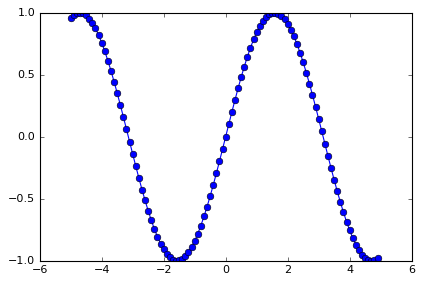

In [17]:
plt.plot(x, y, '-o')

### 課題
以下の関数を（-3 ~ 3）の範囲でプロットせよ

$$
f(x) = \frac{\sin(2\pi x)}{2\pi x}
$$

なお、$f(0)=1$であることに注意する。

### 課題

大きな整数 $k$ の階乗は

$$
k! \sim \sqrt{2\pi k}\left(\frac{k}{e}\right)^k
$$

で近似できることが知られている（スターリングの近似）。

$k = 1, 2, ... , 200$ について、$\log(k!)$ および $\frac{1}{2}\log(2\pi k) + k\log(k) - k$ を一つのグラフ上に描画せよ。
なお、$\pi$の値は`np.pi`から得ることができる。

## 条件分岐

以降では具体例として, 精度よくかつ効率的に$\log(k!)$の値を計算できるプログラムを作成することを目指す. 
それを通して, コンピュータで数値計算をさせるための基礎を学ぶ. 
具体的には, ユーザーにより与えられた$k$の値に応じて, $\log(k!)$の値を計算し, 画面に表示することを目指す. 

$k$の値が小さいとき, $\log(k!)$の値は, $\sum_{n=1}^{k}\log(k)$からすぐに計算できる. 
一方で$k$の値が例えば100,000を超えるようなときは, 100,000回の対数の計算をする必要があり, 
大きな計算コストが必要である. 
そこで前章の演習問題で学んだように, 
大きい$k$の場合には直接$\sum_{n=1}^{k}\log(k)$を計算するよりも, 
その近似である$k\log{k}-k$を計算する方が圧倒的に高速である. 

高精度・高効率に$\log(k!)$を計算するプログラムは以下のような手順を実行することになる. 

1. ユーザーから$k$の値を受け取る. 
2. 与えられた$k$の値が, あるしきい値$k_0$よりも小さければ$\sum_{n=1}^{k}\log(k)$を計算する. 
3. 与えられた$k$の値が, あるしきい値$k_0$よりも大きければ$k\log{k}-k$を計算する. 
4. 結果を画面に表示する. 

### 課題

$\sum_{n=1}^{k}\log(k)$の値と$\frac{1}{2}\log(2\pi k) + k\log{k}-k$の値の差の絶対値を
$k=1,2, \cdots, 1000$について計算し, その差が$10^{-4}$より小さくなる最小の$k$の値を求めよ. 

なお, 本課題は以下の**条件分岐**を学んでから取り組むと, 効率的に解決できる. 

### if 文の文法

上記に示した手順のうち, ２および３は, 特定の条件が満たされたときに計算の挙動を変化させている. 
それを実現する枠組みを**条件分岐**と呼ぶ. 
Pythonでは, `if`文を用いて条件分岐を行う. 

以下に, `if`文の一つの用例を示す. 
ここでは, 二次方程式の判別式を計算して, それが正, 零, 負であるときにそれぞれ異なる処理を行っている. 

In [18]:
def discriminant(a, b, c):
    """
    a x**2 + b x + c = 0 に実数解が存在するか調べるプログラム。
    ２つの実数解が存在する場合は `two real roots` を、重根が存在する場合は `one real root`を、
    実数解が存在しない場合は `two complex roots` を表示する。
    """
    d = b**2 - 4.0*a*c
    if d > 0.0:
        print('two real roots')
    elif d == 0.0:
        print('one real root')
    else:
        print('two complex roots')

In [19]:
discriminant(3.0, 2.0, 1.0)

two complex roots


このように`if`文を使えば、`if`文直後の条件が真か偽かに応じて処理を分岐することができる。

具体的には以下の表のように、適当な等式あるいは不等式を書くことが多い。

| Pythonでの書き方 |    意味    |
|:-----------:|:--------------:|
| `x == y` | $x=y$ (イコール)| 
| `x != y` | $x\neq y$  (ノットイコール)| 
| `x < y` | $x<y$ (小なり)| 
| `x <= y` | $x\leq y$ (小なりイコール)| 
| `x > y` | $x> y$ (大なり)| 
| `x >= y` | $x \leq y$ (大なりイコール)| 


`if`文の仕様パターンは大きくは以下の3通りである。

```
if 条件:
    処理  
```

```
if 条件:
    真の場合の処理
else:
    偽の場合の処理
```

```
if 条件1:
    条件1が真の場合の処理
elif 条件2:
    条件1が真であり条件2が偽の場合の処理
else:
    条件1、2が偽である場合の処理
```


### 課題

二次方程式の判別式を計算し、それが正の時は二実数解、零の時は重解、負の時は複素数解を計算するプログラムを作成せよ。

なお、複素数は $a + b i$ は `np.complex(a,b)` で以下のように表すことができる。

In [20]:
# 2+3i は以下のように表す。
np.complex(2.0,3.0)

(2+3j)

### 課題

以前の演習問題で求めた $\sum_{n=1}^k \log(k)$ の値と $\frac{1}{2}\log(2\pi k) + k \log k - k$ の差が$10^{-4}$ より小さくなる$k$の値を用いて、効率よく$\log(k!)$を計算できる関数を作成せよ。

## 特殊関数の計算

Pythonの特徴は、多様な数学ライブラリが簡単に使える点にある。
ここでは特殊関数の一つである[ベッセル関数](https://ja.wikipedia.org/wiki/%E3%83%99%E3%83%83%E3%82%BB%E3%83%AB%E9%96%A2%E6%95%B0)の計算をする。
ベッセル関数は

$$
x^{2}{\frac  {d^{2}y}{dx^{2}}}+x{\frac  {dy}{dx}}+(x^{2}-\alpha ^{2})y=0
$$

の特殊解の一つであり、
第一種ベッセル関数は

$$
\displaystyle J_{\alpha }(x)=\sum _{{m=0}}^{\infty }{\frac  {(-1)^{m}}{m!\Gamma (m+\alpha +1)}}\left({\frac  {x}{2}}\right)^{{2m+\alpha }}
$$

の形で表される。
ここで $\Gamma(x)$ は別の特殊関数である[ガンマ関数](https://ja.wikipedia.org/wiki/%E3%82%AC%E3%83%B3%E3%83%9E%E9%96%A2%E6%95%B0)である。

発展的な数学に関するライブラリとしては `scipy` が有名である。
特にこのような特殊関数は `scipy.special` にまとめられている。

`v`次の第一種ベッセル関数は `scipy.special.jv(v, x)` 
とすることで呼び出すことができる。詳しくは
[こちら](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.jv.html#scipy.special.jv)を参考にすること。

In [21]:
# scipy.special  をインポート
import scipy.special

In [22]:
# まず、計算する範囲、個数を指定する。今回は、-5~5, 100 点で計算する。
x = []
j0 = [] # α=0 のベッセル関数を計算し格納するリスト
j1 = [] # α=1
j2 = [] # α=2
for i in range(100):
    x.append(20.0 / 100 * i)
    j0.append(scipy.special.jv(0, x[i])) 
    j1.append(scipy.special.jv(1, x[i])) 
    j2.append(scipy.special.jv(2, x[i]))

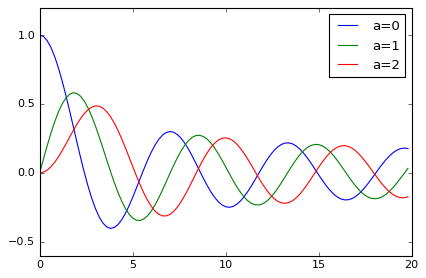

In [23]:
# これらの結果をプロットする
plt.plot(x, j0, label='a=0') # `label=` のあとに文字列を指定することにより、後ほど凡例を表示できる。
plt.plot(x, j1, label='a=1')
plt.plot(x, j2, label='a=2')
plt.legend() # 凡例を表示するためのコマンド

### 課題

[こちらのページ](https://docs.scipy.org/doc/scipy/reference/special.html)に、 `scipy.special` で使うことのできる特殊関数がまとめられている。  
好きな関数を一つピックアップし、グラフに描画せよ。